<a href="https://colab.research.google.com/github/luckysinghal1008/-EDA_Optimising_NYC_Taxis_-lucky-/blob/main/CNN_Waste_Segregation_lucky_Divya_Nair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waste Material Segregation for Improving Waste Management by lucky,Divya Nair**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix



Load the dataset.

In [ ]:
# Load and unzip the dataset

# Replace this URL with your actual dataset download link
dataset_url = "https://woolfaws-prod.s3.ap-south-1.amazonaws.com/sharepoint_zips/Dataset_Waste_Segregation.zip"

# Destination path in Colab
zip_path = "/content/Dataset_Waste_Segregation.zip"
extract_to = "/content"


# Download the dataset
!wget -O "{zip_path}" "{dataset_url}"

# Unzip the dataset
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
file_path='/content/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset downloaded and extracted to: {extract_to}")
!rm Dataset_Waste_Segregation.zip



--2025-11-24 18:19:01--  https://woolfaws-prod.s3.ap-south-1.amazonaws.com/sharepoint_zips/Dataset_Waste_Segregation.zip
Resolving woolfaws-prod.s3.ap-south-1.amazonaws.com (woolfaws-prod.s3.ap-south-1.amazonaws.com)... 52.219.158.202, 16.12.36.26, 52.219.158.162, ...
Connecting to woolfaws-prod.s3.ap-south-1.amazonaws.com (woolfaws-prod.s3.ap-south-1.amazonaws.com)|52.219.158.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497196202 (474M) [application/zip]
Saving to: ‘/content/Dataset_Waste_Segregation.zip’

/content/Dataset_Wa 100%[===================>] 474.16M  44.5MB/s    in 11s     

2025-11-24 18:19:13 (42.3 MB/s) - ‘/content/Dataset_Waste_Segregation.zip’ saved [497196202/497196202]

Dataset downloaded and extracted to: /content


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images

from skimage import io
import os
import glob
import random
def load_raw_images_glob(folder_path,category):
  images = []
  filenames = []
  for file_path in glob.glob(os.path.join(folder_path,category,'*')):
    try:
      img = Image.open(file_path).convert('RGB')
      images.append(img)
      filenames.append(os.path.basename(file_path))
    except Exception as e:
      print(f"Error loading {file_path}: {e}")

  return images, filenames


Loaded 540 raw images from /content/data


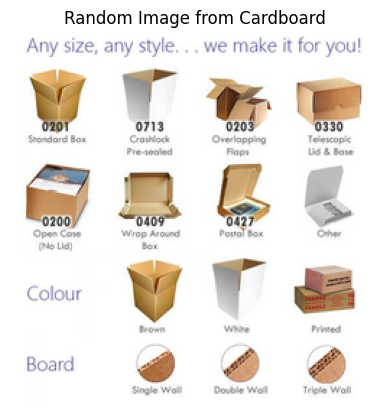

In [ ]:
folder_path = '/content/data'
categories=['Cardboard','Food_Waste','Glass','Metal','Other','Paper','Plastic']
images, filenames = load_raw_images_glob(folder_path,categories[0])
print(f"Loaded {len(images)} raw images from {folder_path}")

random_image = random.choice(images)
plt.imshow(random_image)
plt.axis('off')
plt.title("Random Image from " + categories[0])
plt.show()


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels

all_images = []
all_labels = []

for category in categories:
    imgs, _ = load_raw_images_glob(folder_path, category)
    all_images.extend(imgs)
    all_labels.extend([category] * len(imgs))

print(f"Total images loaded: {len(all_images)} across {len(categories)} categories.")


Total images loaded: 7625 across 7 categories.


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

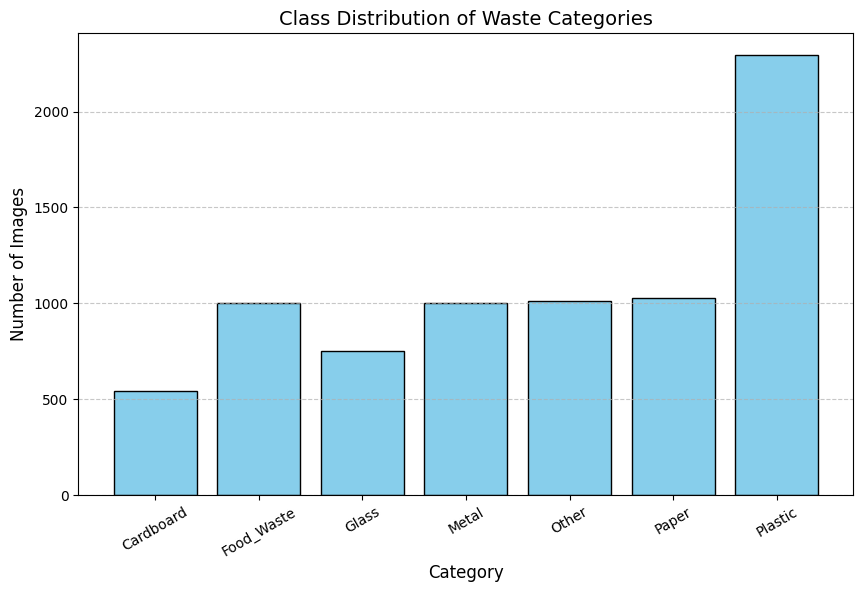

In [ ]:
# Visualise Data Distribution
from collections import Counter
class_counts = Counter(all_labels)
categories = list(class_counts.keys())
counts = list(class_counts.values())
plt.figure(figsize=(10,6))
plt.bar( categories,counts,color='skyblue', edgecolor='black')
plt.title('Class Distribution of Waste Categories', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

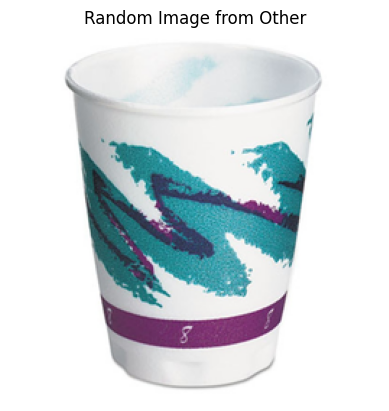

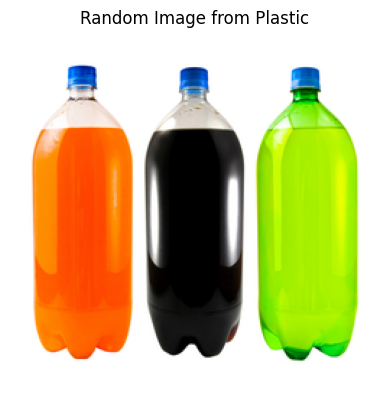

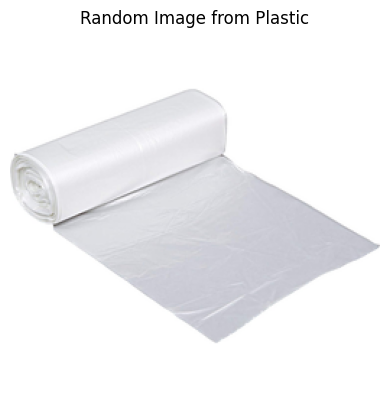

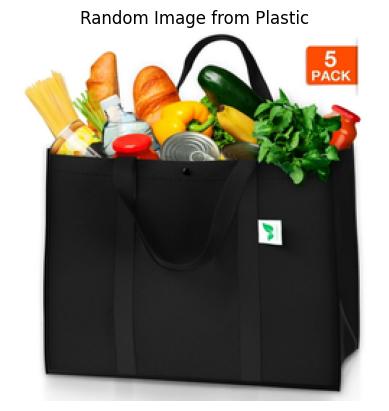

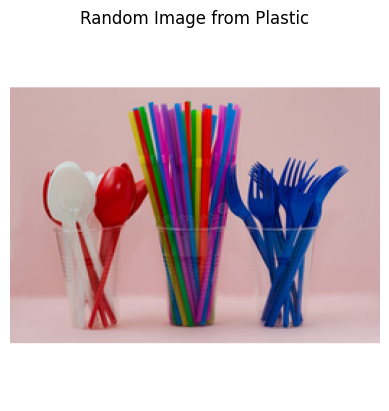

In [ ]:
# Visualise Sample Images (across different labels)

for  i in range(5):
  random_image = random.choice(all_images)
  idx = all_images.index(random_image)
  plt.imshow(random_image)
  plt.axis('off')
  plt.title("Random Image from " + all_labels[idx])
  plt.show()

In [ ]:
import numpy as np
from collections import Counter

label_counts = Counter(all_labels)
print("Label counts:", label_counts)

# Identify majority class
majority_class = max(label_counts, key=label_counts.get)
print("Majority class:", majority_class)


Label counts: Counter({'Plastic': 2295, 'Paper': 1030, 'Other': 1010, 'Food_Waste': 1000, 'Metal': 1000, 'Glass': 750, 'Cardboard': 540})
Majority class: Plastic


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set

import numpy as np
img_width=[]
img_height=[]
for img in all_images:
  x, y = img.size
  img_width.append(x)
  img_height.append(y)


print(f'max dimensions are:{max(img_width),max(img_height)}')
print(f'min dimensions are:{min(img_width),min(img_height)}')

max dimensions are:(256, 256)
min dimensions are:(256, 256)


In [ ]:
# Resize the image dimensions
resized_images = []
for img in all_images:
    width, height = img.size
    resized_img = img.resize((160, 160))
    resized_images.append(resized_img)




### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(all_labels)

print("Integer Encoded Labels:", integer_encoded)

one_hot_labels = to_categorical(integer_encoded, num_classes=7)
print("One-hot encoded labels:\n", one_hot_labels)



Integer Encoded Labels: [0 0 0 ... 6 6 6]
One-hot encoded labels:
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets
X = np.array(resized_images)
y = np.array(one_hot_labels)
X=X.astype('float32')/255.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator with augmentation
train_datagen = ImageDataGenerator()

# Define a basic generator for validation (no augmentation)
val_datagen = ImageDataGenerator()

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = train_datagen.flow(
    X_train, y_train,batch_size=32
)

val_generator = val_datagen.flow(
    X_val, y_val,batch_size=32
)


In [ ]:
import numpy as np
import gc
gc.collect()
tf.keras.backend.clear_session()
np.save("/content/X_train.npy", X_train)
np.save("/content/y_train.npy", y_train)
np.save("/content/X_val.npy", X_val)
np.save("/content/y_val.npy", y_val)


del resized_images
del one_hot_labels
del all_images
del all_labels
del X
del y

import gc
gc.collect()
tf.keras.backend.clear_session()

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
from matplotlib.cbook import flatten
# === Import Libraries ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.initializers import HeNormal, GlorotUniform

tf.keras.backend.clear_session()
num_classes=7
model = Sequential()

    # --- Conv Block 1 --- #
model.add(Conv2D(32, (3,3), padding='same', input_shape=(160,160,3),kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

    # --- Conv Block 2 --- #
model.add(Conv2D(64, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


    # --- Conv Block 3 --- #
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())

from tensorflow.keras.layers import GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

    # --- Dense Layer --- #
model.add(Dense(128,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
              metrics=['accuracy'])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                    patience=2,
    min_lr=1e-7,
    verbose=1
)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 160, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80, 80, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 80, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 314,791 (1.20 MB)

 Trainable params: 313,511 (1.20 MB)

 Non-trainable params: 1,280 (5.00 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training
from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1)),class_weight=dict(enumerate(class_weights))
model.fit(train_generator,
    validation_data=val_generator,
    epochs=25,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate on the test set; display suitable metrics

y_true = np.argmax(y_val, axis=1)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(model.metrics_names)
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=[f"{categories[i]}" for i in range(num_classes)])
print("Classification Report:")
print(report)

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 50s 156ms/step - accuracy: 0.2206 - loss: 2.2521 - val_accuracy: 0.1961 - val_loss: 2.1245 - learning_rate: 1.0000e-04
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.3325 - loss: 1.8638 - val_accuracy: 0.3161 - val_loss: 1.9242 - learning_rate: 1.0000e-04
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.3713 - loss: 1.7914 - val_accuracy: 0.3790 - val_loss: 1.8839 - learning_rate: 1.0000e-04
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.4043 - loss: 1.7237 - val_accuracy: 0.4577 - val_loss: 1.6224 - learning_rate: 1.0000e-04
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.4302 - loss: 1.6415 - val_accuracy: 0.4525 - val_loss: 1.6147 - learning_rate: 1.0000e-04
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.4485 - loss: 1.6085 - val_accuracy: 0.4892 - val_loss: 1.5613 - learning_rate: 1.0000e-04
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accura

In [ ]:
from matplotlib.cbook import flatten
# === Import Libraries ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.initializers import HeNormal, GlorotUniform

tf.keras.backend.clear_session()
num_classes=7
model = Sequential()

    # --- Conv Block 1 --- #
model.add(Conv2D(64, (3,3), padding='same', input_shape=(160,160,3),kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

    # --- Conv Block 2 --- #
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


    # --- Conv Block 3 --- #
model.add(Conv2D(256, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
from tensorflow.keras.layers import GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

    # --- Dense Layer --- #
model.add(Dense(256,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(128,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
              metrics=['accuracy'])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                    patience=2,
    min_lr=1e-7,
    verbose=1
)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
model.summary()
# Training
from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1)),class_weight=dict(enumerate(class_weights))
model.fit(train_generator,
    validation_data=val_generator,
    epochs=25,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
# Evaluate on the test set; display suitable metrics

y_true = np.argmax(y_val, axis=1)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(model.metrics_names)
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=[f"{categories[i]}" for i in range(num_classes)])
print("Classification Report:")
print(report)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160, 160, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 160, 160, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80, 80, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 80, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 40, 40, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 40, 40, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 40, 40, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,250,119 (4.77 MB)

 Trainable params: 1,247,559 (4.76 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 49s 210ms/step - accuracy: 0.3192 - loss: 2.0098 - val_accuracy: 0.2466 - val_loss: 1.9536 - learning_rate: 1.0000e-04
Epoch 2/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.4737 - loss: 1.5848 - val_accuracy: 0.3770 - val_loss: 1.8159 - learning_rate: 1.0000e-04
Epoch 3/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.5254 - loss: 1.5079 - val_accuracy: 0.3705 - val_loss: 2.2135 - learning_rate: 1.0000e-04
Epoch 4/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 178ms/step - accuracy: 0.5389 - loss: 1.4236 - val_accuracy: 0.5134 - val_loss: 1.5547 - learning_rate: 1.0000e-04
Epoch 5/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.5895 - loss: 1.3311 - val_accuracy: 0.5318 - val_loss: 1.4830 - learning_rate: 1.0000e-04
Epoch 6/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.6167 - loss: 1.2694 - val_accuracy: 0.5187 - val_loss: 1.6352 - learning_rate: 1.0000e-04
Epoch 7/25
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 164

In [ ]:
from matplotlib.cbook import flatten
# === Import Libraries ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.initializers import HeNormal, GlorotUniform

tf.keras.backend.clear_session()
num_classes=7
model = Sequential()

    # --- Conv Block 1 --- #
model.add(Conv2D(64, (3,3), padding='same', input_shape=(160,160,3),kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

    # --- Conv Block 2 --- #
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


    # --- Conv Block 3 --- #
model.add(Conv2D(256, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())

from tensorflow.keras.layers import GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

    # --- Dense Layer --- #
model.add(Dense(256,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
              metrics=['accuracy'])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                    patience=2,
    min_lr=1e-7,
    verbose=1
)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
model.summary()
# Training
from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1)),class_weight=dict(enumerate(class_weights))
model.fit(train_generator,
    validation_data=val_generator,
    epochs=45,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
# Evaluate on the test set; display suitable metrics

y_true = np.argmax(y_val, axis=1)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(model.metrics_names)
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=[f"{categories[i]}" for i in range(num_classes)])
print("Classification Report:")
print(report)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160, 160, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 160, 160, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80, 80, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 80, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 40, 40, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 40, 40, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 40, 40, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,250,119 (4.77 MB)

 Trainable params: 1,247,559 (4.76 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 51s 214ms/step - accuracy: 0.2669 - loss: 2.1886 - val_accuracy: 0.1679 - val_loss: 2.1592 - learning_rate: 1.0000e-04
Epoch 2/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.3940 - loss: 1.8032 - val_accuracy: 0.3921 - val_loss: 1.7918 - learning_rate: 1.0000e-04
Epoch 3/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.4347 - loss: 1.6886 - val_accuracy: 0.4256 - val_loss: 1.6969 - learning_rate: 1.0000e-04
Epoch 4/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.4724 - loss: 1.6026 - val_accuracy: 0.4466 - val_loss: 1.6530 - learning_rate: 1.0000e-04
Epoch 5/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.4910 - loss: 1.5663 - val_accuracy: 0.4767 - val_loss: 1.5617 - learning_rate: 1.0000e-04
Epoch 6/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - accuracy: 0.5228 - loss: 1.4800 - val_accuracy: 0.5298 - val_loss: 1.5244 - learning_rate: 1.0000e-04
Epoch 7/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 17

In [ ]:
from matplotlib.cbook import flatten
# === Import Libraries ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.initializers import HeNormal, GlorotUniform

tf.keras.backend.clear_session()
num_classes=7
model = Sequential()

    # --- Conv Block 1 --- #
model.add(Conv2D(64, (3,3), padding='same', input_shape=(160,160,3),kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

    # --- Conv Block 2 --- #
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


    # --- Conv Block 3 --- #
model.add(Conv2D(256, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same',kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())

from tensorflow.keras.layers import GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

    # --- Dense Layer --- #
model.add(Dense(256,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128,kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
              metrics=['accuracy'])


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                    patience=2,
    min_lr=1e-7,
    verbose=1
)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
model.summary()
# Training
from sklearn.utils.class_weight import compute_class_weight

#class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1)),class_weight=dict(enumerate(class_weights))
model.fit(train_generator,
    validation_data=val_generator,
    epochs=45,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160, 160, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 160, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 160, 160, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 160, 160, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80, 80, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 80, 80, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 80, 80, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 80, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 40, 40, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 40, 40, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 40, 40, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,250,119 (4.77 MB)

 Trainable params: 1,247,559 (4.76 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 51s 215ms/step - accuracy: 0.2598 - loss: 2.2035 - val_accuracy: 0.2262 - val_loss: 1.9835 - learning_rate: 1.0000e-04
Epoch 2/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.3749 - loss: 1.8744 - val_accuracy: 0.3639 - val_loss: 1.7856 - learning_rate: 1.0000e-04
Epoch 3/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.4401 - loss: 1.7208 - val_accuracy: 0.4669 - val_loss: 1.6946 - learning_rate: 1.0000e-04
Epoch 4/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.4538 - loss: 1.6374 - val_accuracy: 0.5036 - val_loss: 1.5624 - learning_rate: 1.0000e-04
Epoch 5/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.4938 - loss: 1.5814 - val_accuracy: 0.5128 - val_loss: 1.5347 - learning_rate: 1.0000e-04
Epoch 6/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.4997 - loss: 1.5388 - val_accuracy: 0.4839 - val_loss: 1.6730 - learning_rate: 1.0000e-04
Epoch 7/45
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 17

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:


# Evaluate on the test set; display suitable metrics

y_true = np.argmax(y_val, axis=1)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(model.metrics_names)
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=[f"{categories[i]}" for i in range(num_classes)])
print("Classification Report:")
print(report)

191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8558 - loss: 0.7293
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7188 - loss: 1.0422
Test Loss: 1.0930
Test Accuracy: 0.7023
['loss', 'compile_metrics']
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step
Confusion Matrix:
[[ 78   6   1   2   3  12   6]
 [  3 147   3   3  18   8  18]
 [  4   5  93  11   3   4  30]
 [  0   3   8 149  12   9  19]
 [  4   8   7  13 123  15  32]
 [  4  12   3  13  20 119  35]
 [  0  10  19  12  32  24 362]]
Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.84      0.72      0.78       108
  Food_Waste       0.77      0.73      0.75       200
       Glass       0.69      0.62      0.65       150
       Metal       0.73      0.74      0.74       200
       Other       0.58      0.61      0.60       202
       Paper       0.62      0.58      0.60       206
     Plastic       0.72      0.79      0.75       459

    accuracy                           0.70     

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data:

**The dataset contains 7,625 images across 7 waste categories: Food Waste, Metal, Paper, Plastic, Other, Cardboard, and Glass.
All images have a uniform resolution of 256×256 pixels.
Label distribution is imbalanced, with counts ranging from 540 (Cardboard) to 2,295 (Plastic).
Plastic is the majority class, while Cardboard is the minority class.
Overall, the dataset shows significant class imbalance and may require augmentation or resampling for balanced training.**


* Report model training results

**Model 1**:
This CNN architecture uses three convolutional blocks vgg like with **32, 64, and 128 filters**, each combined with ReLU activation and Batch Normalization to stabilize learning. Global Average Pooling is applied to reduce feature maps before entering fully connected layers. Two dense layers with L2 regularization and dropout **(0.4)** enhance generalization and reduce overfitting. The network outputs probabilities for seven classes using a softmax layer. Training is supported by the Adam optimizer, label smoothing, learning-rate reduction, and early stopping for better convergence.

**result:**

The model shows steady improvement, rising from 22% to 64% training accuracy and reaching ~59% validation/test accuracy with a final val_loss ≈ 1.29. Learning-rate reductions helped stabilize training, with the largest accuracy jump occurring after LR dropped below 5e-5. The confusion matrix shows strong performance on Plastic, Metal, Cardboard, but Glass, Other, and Paper remain difficult due to high intra-class variation and visual overlap. Precision and recall are well-balanced overall, giving a macro F1 ≈ 0.56 across seven classes.


**model 2**:
This model is a deep CNN built with three convolutional blocks using **64, 128, and 256 filters**, each paired with ReLU activation and Batch Normalization to ensure stable training. Global Average Pooling is applied to compress feature maps before entering the dense layers. Two fully connected layers with 256 and 128 units, along with L2 regularization **no dropout**, help improve generalization. The final softmax layer outputs predictions for seven classes. Training is optimized with Adam, label smoothing, learning rate reduction, and early stopping for efficient convergence.

**result**:

The model trains effectively, reaching **84% training accuracy, ~69% validation/test accuracy**, and a final validation loss of **1.16**, showing stable convergence. Learning-rate reductions help smooth the training curve and prevent overfitting. The confusion matrix and classification report indicate strong performance in Plastic, Metal, Cardboard, and Food Waste, while **Paper and Other** remain comparatively challenging due to class similarity. Overall, the model generalizes well with balanced precision and recall across most categories.


**model 3**:

This CNN uses three convolutional blocks with **64, 128, and 256 filters**, each followed by ReLU activation and Batch Normalization to maintain stable training. Global Average Pooling is applied to reduce feature dimensions before entering the dense layers. Fully connected layers with 256 and 128 units use L2 regularization and a dropout **(0.3)**  layer to reduce overfitting. The final softmax layer outputs predictions for seven waste categories. Training is optimized with Adam, label smoothing, early stopping, and learning-rate reduction for better convergence and generalization.

**result**:

The model shows strong learning progression, reaching **80–81%** training accuracy and stabilizing at **71–72%** validation/test accuracy with a final val_loss of  **1.11** . Validation accuracy improves steadily as the learning rate reduces, indicating effective LR scheduling. The confusion matrix and classification report show high performance in Metal, Plastic, Cardboard, Food Waste, while **Paper and Other** remain comparatively challenging due to class overlap. Overall, the network generalizes well with balanced precision and recall across most categories.


**model 4**:
This CNN consists of three convolutional blocks with **64, 128, and 256 filters** , each followed by ReLU activation and Batch Normalization for stable and efficient training. After feature extraction, Global Average Pooling is used to reduce spatial dimensions before entering dense layers. The fully connected layers with 256 and 128 units include L2 regularization and dropout **(0.4)** to minimize overfitting. A softmax output layer predicts seven waste categories. Training uses the Adam optimizer, label smoothing, learning-rate reduction, and early stopping to achieve smooth convergence and improved generalization

**result**:

The model shows steady learning, improving from **26% → 78%** training accuracy, and stabilizing at **70–71%** validation/test accuracy with a final val_loss  **1.09** . Learning-rate reductions clearly helped smooth convergence and prevent overfitting in later epochs. The confusion matrix and classification report indicate strong performance in Plastic, Metal, Cardboard, and Food Waste, while **Paper and Other** remain the most challenging due to visual similarity and class overlap.  Overall, the network generalizes well, achieving a balanced macro **F1 ≈ 0.70**  across seven waste categories.